In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

In [18]:
 txn = pd.read_csv('Retail_Data_Transactions.csv')

In [20]:
 txn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [23]:
txn['txn_date'] = pd.to_datetime(txn.trans_date)

In [31]:
#drop column
txn = txn.drop(columns = ['trans_date'])

KeyError: "['trans_date'] not found in axis"

In [30]:
txn

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
...,...,...,...
124995,CS8433,64,2011-06-26
124996,CS7232,38,2014-08-19
124997,CS8731,42,2014-11-28
124998,CS8133,13,2013-12-14


In [32]:
min(txn.txn_date)

Timestamp('2011-05-16 00:00:00')

In [33]:
max(txn.txn_date)

Timestamp('2015-03-16 00:00:00')

In [34]:
txn['ME_DT']=MonthEnd(0)+txn.txn_date

In [35]:
txn

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30
...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30
124996,CS7232,38,2014-08-19,2014-08-31
124997,CS8731,42,2014-11-28,2014-11-30
124998,CS8133,13,2013-12-14,2013-12-31


In [36]:
MonthEnd(0)

<0 * MonthEnds>

In [38]:
txn['YEAR'] = pd.to_datetime(txn['txn_date']).dt.year

In [39]:
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


In [41]:
group_client = ["customer_id","YEAR"]
clnt_annnual_aggregations = txn.groupby(group_client).agg(ann_txn_amt_sum = pd.NamedAgg(column='tran_amount',aggfunc = np.sum),
                                                         ann_txn_amt_ave = pd.NamedAgg(column ='tran_amount',aggfunc=np.mean),
                                                         ann_txn_amt_std = pd.NamedAgg(column ='tran_amount',aggfunc='std'),
                                                         ann_txn_amt_var = pd.NamedAgg(column ='tran_amount',aggfunc='var'),
                                                          ann_txn_amt_sem = pd.NamedAgg(column ='tran_amount',aggfunc='sem'),
                                                          ann_txn_amt_max = pd.NamedAgg(column ='tran_amount',aggfunc='max'),
                                                          ann_txn_amt_min = pd.NamedAgg(column ='tran_amount',aggfunc='min'),
                                                         ann_txn_cnt = pd.NamedAgg(column ='tran_amount',aggfunc='count'),
                                                         )

In [42]:
clnt_annnual_aggregations

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
...                           ...              ...              ...   
CS9000      2011               39        19.500000         4.949747   
            2012              216        54.000000        16.772994   
            2013              147        73.500000         3.535534   
            2014               97        24.250000         8.261356   
            2015               34        34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_cnt  
customer_id YEAR                                
CS1112      2011               56            3  
            2012               52            5  
            2013               36            3  
            2014               59            3  
            2015               39            1  
...                           ...          ...  
CS9000      2011               16            2  
            2012               37            4  
            2013               71            2  
            2014               16            4  
            2015               34            1  

[31140 rows x 8 columns]

<Axes: xlabel='ann_txn_cnt', ylabel='Count'>

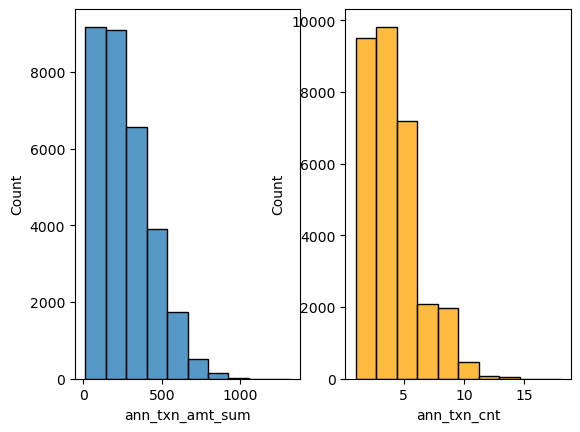

In [45]:
fig,ax = plt.subplots(1,2)
sns.histplot(data = clnt_annnual_aggregations['ann_txn_amt_sum'],bins = 10, ax = ax[0])
sns.histplot(data = clnt_annnual_aggregations['ann_txn_cnt'],bins = 10, ax = ax[1],color='Orange')

In [48]:
#pivot table??
clnt_annnual_aggregations_pivot=pd.pivot_table(clnt_annnual_aggregations.reset_index(),columns = ['YEAR'], index= ['customer_id'])
clnt_annnual_aggregations_pivot

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000        NaN   
...                     ...        ...        ...        ...        ...   
CS8996            31.000000  33.666667  41.500000  56.000000        NaN   
CS8997            45.000000  39.500000  35.166667  42.000000        NaN   
CS8998            64.000000  54.400000  47.000000  32.500000        NaN   
CS8999            52.000000  25.250000  28.000000  21.000000        NaN   
CS9000            19.500000  54.000000  73.500000  24.250000  34.000000   

            ann_txn_amt_max                            ... ann_txn_amt_var  \
YEAR                   2011   2012   2013  2014  2015  ...            2011   
customer_id                                            ...                   
CS1112                 96.0   81.0  105.0  90.0  39.0  ...      485.333333   
CS1113                 94.0   95.0   97.0  97.0  98.0  ...      444.333333   
CS1114                 97.0   97.0  105.0  95.0  79.0  ...       94.700000   
CS1115                102.0  104.0   94.0  98.0  55.0  ...      225.000000   
CS1116                 87.0  105.0   59.0  96.0   NaN  ...      449.583333   
...                     ...    ...    ...   ...   ...  ...             ...   
CS8996                 38.0   38.0   50.0  79.0   NaN  ...       98.000000   
CS8997                 47.0   49.0   75.0  45.0   NaN  ...        8.000000   
CS8998                 69.0   79.0   75.0  49.0   NaN  ...       50.000000   
CS8999                 64.0   30.0   39.0  24.0   NaN  ...      333.000000   
CS9000                 23.0   77.0   76.0  35.0  34.0  ...       24.500000   

                                                             ann_txn_cnt       \
YEAR               2012         2013        2014        2015        2011 2012   
customer_id                                                                     
CS1112       161.800000  1190.333333  284.333333         NaN         3.0  5.0   
CS1113       290.200000   171.200000  781.666667  745.333333         3.0  5.0   
CS1114       968.000000   619.300000  726.166667         NaN         5.0  2.0   
CS1115       477.285714   110.952381  512.250000         NaN         3.0  7.0   
CS1116       908.333333          NaN  636.800000         NaN         4.0  3.0   
...                 ...          ...         ...         ...         ...  ...   
CS8996        20.333333   144.500000  481.600000         NaN         2.0  3.0   
CS8997        45.666667   441.366667   18.000000         NaN         2.0  4.0   
CS8998       505.300000  1568.000000  219.666667         NaN         2.0  5.0   
CS8999        21.583333   103.000000   18.000000         NaN         3.0  4.0   
CS9000       281.333333    12.500000   68.250000         NaN         2.0  4.0   

                            
YEAR        2013 2014 2015  
customer_id                 
CS1112       3.0  3.0  1.0  
CS1113       5.0  4.0  3.0  
CS1114       5.0  6.0  1.0  
CS1115       7.0  4.0  1.0  
CS1116       1.0  5.0  NaN  
...          ...  ...  ...  
CS8996       2.0  6.0  NaN  
CS8997       6.0  2.0  NaN  
CS8998       2.0  4.0  NaN  
CS8999       3.0  2.0  NaN  
CS9000       2.0  4.0  1.0  

[6889 rows x 40 columns]

In [49]:
#simple data cleaning step
clnt_annnual_aggregations_pivot=clnt_annnual_aggregations_pivot.fillna(0)
clnt_annnual_aggregations_pivot

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   
...                     ...        ...        ...        ...        ...   
CS8996            31.000000  33.666667  41.500000  56.000000   0.000000   
CS8997            45.000000  39.500000  35.166667  42.000000   0.000000   
CS8998            64.000000  54.400000  47.000000  32.500000   0.000000   
CS8999            52.000000  25.250000  28.000000  21.000000   0.000000   
CS9000            19.500000  54.000000  73.500000  24.250000  34.000000   

            ann_txn_amt_max                            ... ann_txn_amt_var  \
YEAR                   2011   2012   2013  2014  2015  ...            2011   
customer_id                                            ...                   
CS1112                 96.0   81.0  105.0  90.0  39.0  ...      485.333333   
CS1113                 94.0   95.0   97.0  97.0  98.0  ...      444.333333   
CS1114                 97.0   97.0  105.0  95.0  79.0  ...       94.700000   
CS1115                102.0  104.0   94.0  98.0  55.0  ...      225.000000   
CS1116                 87.0  105.0   59.0  96.0   0.0  ...      449.583333   
...                     ...    ...    ...   ...   ...  ...             ...   
CS8996                 38.0   38.0   50.0  79.0   0.0  ...       98.000000   
CS8997                 47.0   49.0   75.0  45.0   0.0  ...        8.000000   
CS8998                 69.0   79.0   75.0  49.0   0.0  ...       50.000000   
CS8999                 64.0   30.0   39.0  24.0   0.0  ...      333.000000   
CS9000                 23.0   77.0   76.0  35.0  34.0  ...       24.500000   

                                                             ann_txn_cnt       \
YEAR               2012         2013        2014        2015        2011 2012   
customer_id                                                                     
CS1112       161.800000  1190.333333  284.333333    0.000000         3.0  5.0   
CS1113       290.200000   171.200000  781.666667  745.333333         3.0  5.0   
CS1114       968.000000   619.300000  726.166667    0.000000         5.0  2.0   
CS1115       477.285714   110.952381  512.250000    0.000000         3.0  7.0   
CS1116       908.333333     0.000000  636.800000    0.000000         4.0  3.0   
...                 ...          ...         ...         ...         ...  ...   
CS8996        20.333333   144.500000  481.600000    0.000000         2.0  3.0   
CS8997        45.666667   441.366667   18.000000    0.000000         2.0  4.0   
CS8998       505.300000  1568.000000  219.666667    0.000000         2.0  5.0   
CS8999        21.583333   103.000000   18.000000    0.000000         3.0  4.0   
CS9000       281.333333    12.500000   68.250000    0.000000         2.0  4.0   

                            
YEAR        2013 2014 2015  
customer_id                 
CS1112       3.0  3.0  1.0  
CS1113       5.0  4.0  3.0  
CS1114       5.0  6.0  1.0  
CS1115       7.0  4.0  1.0  
CS1116       1.0  5.0  0.0  
...          ...  ...  ...  
CS8996       2.0  6.0  0.0  
CS8997       6.0  2.0  0.0  
CS8998       2.0  4.0  0.0  
CS8999       3.0  2.0  0.0  
CS9000       2.0  4.0  1.0  

[6889 rows x 40 columns]